In [4]:
import pandas

data_path = "../data/"
filename = "test_dummy_data.csv"

df = pandas.read_csv(data_path + filename)
df.head()

,Date,State,EmergDec,GathRecomAny,GathRestrict10,GathRestrictAny,NEBusinessClose,OtherBusinessClose,PublicMask,Quarantine,RestaurantRestrict,SchoolClose,StayAtHome,Mandate,StateWide,Cases,Deaths
0,2/3/2020,Washington,0,0,1,0,0,0,0,1,1,1,1,0,1,20,5
1,2/4/2020,Washington,0,0,1,0,0,0,0,1,1,1,1,0,1,34,4
2,2/5/2020,Washington,0,0,1,0,1,1,0,1,1,1,1,0,1,5,5
3,2/6/2020,Washington,1,0,1,0,1,1,0,1,1,1,1,0,1,34,6
4,2/7/2020,Washington,1,0,1,0,1,1,0,1,1,1,1,0,1,5,3


In [82]:
target = "Cases" #"Deaths", "Cases"
not_features = ["Date", "State"]
not_features.append(target)

target_values = df[target]
feature_values = df

for x in not_features:
    feature_values = feature_values.drop(x, axis=1)

feature_values.head()

,EmergDec,GathRecomAny,GathRestrict10,GathRestrictAny,NEBusinessClose,OtherBusinessClose,PublicMask,Quarantine,RestaurantRestrict,SchoolClose,StayAtHome,Mandate,StateWide,Deaths
0,0,0,1,0,0,0,0,1,1,1,1,0,1,5
1,0,0,1,0,0,0,0,1,1,1,1,0,1,4
2,0,0,1,0,1,1,0,1,1,1,1,0,1,5
3,1,0,1,0,1,1,0,1,1,1,1,0,1,6
4,1,0,1,0,1,1,0,1,1,1,1,0,1,3


In [152]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

sc = StandardScaler() #center mean at 0, variance to 1

x_train, x_test, y_train, y_test = train_test_split(feature_values, target_values, test_size=0.5, random_state=0)

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

,EmergDec,GathRecomAny,GathRestrict10,GathRestrictAny,NEBusinessClose,OtherBusinessClose,PublicMask,Quarantine,RestaurantRestrict,SchoolClose,StayAtHome,Mandate,StateWide,Deaths
7,1,1,1,0,1,1,1,1,1,1,1,0,1,8
8,1,1,1,0,1,1,1,1,1,1,1,0,1,2
3,1,0,1,0,1,1,0,1,1,1,1,0,1,6
0,0,0,1,0,0,0,0,1,1,1,1,0,1,5
5,1,0,1,0,1,1,0,1,1,1,1,0,1,5


In [155]:
'''
Recursive feature Elimination
Rank features in terms of accuracy in prediction power
'''
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

num_features = 1

model = LogisticRegression()
rfe = RFE(model, num_features)

fit = rfe.fit(x_train, y_train)

order = [list(x) for x in zip(fit.ranking_, feature_values.columns.values)]
order.sort()
order

[[1, 'OtherBusinessClose'],
 [2, 'PublicMask'],
 [3, 'NEBusinessClose'],
 [4, 'GathRecomAny'],
 [5, 'Deaths'],
 [6, 'EmergDec'],
 [7, 'StateWide'],
 [8, 'StayAtHome'],
 [9, 'SchoolClose'],
 [10, 'RestaurantRestrict'],
 [11, 'Quarantine'],
 [12, 'GathRestrict10'],
 [13, 'Mandate'],
 [14, 'GathRestrictAny']]

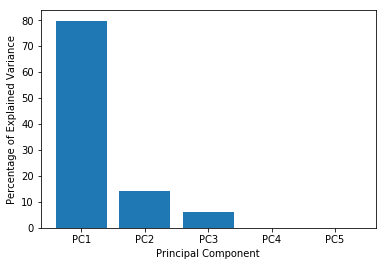

In [158]:
'''
Principal Components Analysis
Create and select new features with highest variance 
'''
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA()

x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

percent_variation = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ["PC" + str(x) for x in range(1, len(percent_variation)+1)]

#plot principal components with the largest explained variance 
plt.bar(x=range(1,len(percent_variation)+1), height=percent_variation, tick_label=labels)
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("Principal Component")
plt.show()